<a href="https://colab.research.google.com/github/vivianvp/Vivian-pan-projects/blob/main/Gym_Crowdedness_Prediction_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Wrangling

## **Import Libraries & Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_id = '1PV715uf7wJ-ujb5ZBMZgk83a2D8i7U0S'
download_link = f"https://drive.google.com/uc?id={file_id}"

!wget -O data.csv '{download_link}'

gym_df = pd.read_csv("data.csv")
gym_df.head(12)

--2024-06-02 00:25:23--  https://drive.google.com/uc?id=1PV715uf7wJ-ujb5ZBMZgk83a2D8i7U0S
Resolving drive.google.com (drive.google.com)... 142.251.31.102, 142.251.31.113, 142.251.31.101, ...
Connecting to drive.google.com (drive.google.com)|142.251.31.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1PV715uf7wJ-ujb5ZBMZgk83a2D8i7U0S [following]
--2024-06-02 00:25:23--  https://drive.usercontent.google.com/download?id=1PV715uf7wJ-ujb5ZBMZgk83a2D8i7U0S
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.153.132, 2a00:1450:4013:c16::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.153.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3447605 (3.3M) [application/octet-stream]
Saving to: ‘data.csv’

data.csv            100%[===================>]   3.29M  --.-KB/s    in 0.03s   

2024-06-02 00:25:25 (116 MB/s) - ‘d

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17
5,46,2015-08-14 18:00:18-07:00,64818,4,0,0,72.15,0,0,8,18
6,43,2015-08-14 18:20:08-07:00,66008,4,0,0,72.15,0,0,8,18
7,53,2015-08-14 18:30:09-07:00,66609,4,0,0,72.15,0,0,8,18
8,54,2015-08-14 18:40:14-07:00,67214,4,0,0,72.15,0,0,8,18
9,43,2015-08-14 18:50:15-07:00,67815,4,0,0,72.15,0,0,8,18


Data set link: https://www.kaggle.com/datasets/nsrose7224/crowdedness-at-the-campus-gym

### Understanding the Data set

The data that we will be using was collected by Nick Rose who measured out how many people were at their campus gym once every 10 minutes. The data collected consisted of 26,000 people.

The dependent variable is **number_people** (the number of people in the gym).

### Independent Variables:
- **date:** Exact time of data when it was observed. (String)
- **timestamp:** Number of seconds since the beginning of the day. (Int)
- **day_of_week:** What day of the week it is. 0 as Monday - 6 as Sunday. (Int)
- **is_weekend:** Whether or not it's the weekend: 0 as no and 1 as yes it's the weekend. (Int)
- **is_holiday:** Whether or not it's a federal holiday: 1 if it is a holiday and 0 if it's not. (Int)
- **temperature:** The temperature in degrees fahrenheit. (float)
- **is_start_of_semester:** Whether or not it's the start of the semester: 1 if it's the beginning of the semester and 0 if it's not. (Int)
- **month:** Which month it is. 1 as Janruary - 12 as December. (Int)
- **hour:** Which hour of the day it is from 0-23. (Int)

## **Preprocessing**



### Create day_of_month column

In [ ]:
gym_df['date'] = gym_df['date'].astype(str)

# Extracting the day of the month using string slicing
gym_df['day_of_month'] = gym_df['date'].str.slice(8, 10).astype(int)


# Print the updated DataFrame
gym_df.head(12)

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,day_of_month
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17,14
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17,14
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17,14
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17,14
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17,14
5,46,2015-08-14 18:00:18-07:00,64818,4,0,0,72.15,0,0,8,18,14
6,43,2015-08-14 18:20:08-07:00,66008,4,0,0,72.15,0,0,8,18,14
7,53,2015-08-14 18:30:09-07:00,66609,4,0,0,72.15,0,0,8,18,14
8,54,2015-08-14 18:40:14-07:00,67214,4,0,0,72.15,0,0,8,18,14
9,43,2015-08-14 18:50:15-07:00,67815,4,0,0,72.15,0,0,8,18,14


### Data Aggregation

From observation every 10 minutes to observation every hour


In [ ]:
import pandas as pd

# Assuming gym_df is your DataFrame
# Extract the Year-Month-Day-Hour part from the 'date' column
gym_df['hour_key'] = gym_df['date'].str.slice(0, 13)

# Group by 'hour_key' and calculate the mean for 'number_people'
average_people = gym_df.groupby('hour_key')['number_people'].mean().reset_index()
average_people.rename(columns={'number_people': 'avg_num_ppl'}, inplace=True)

# Create a DataFrame with distinct 'hour_key' to merge other columns
# Ensure 'hour_key' is included
distinct_hourly = gym_df.drop_duplicates(subset='hour_key')[['hour_key', 'timestamp', 'day_of_week', 'is_weekend', 'is_holiday', 'temperature', 'is_start_of_semester', 'is_during_semester', 'month', 'hour', 'day_of_month']]

# Merge to get one row per hour with all required data
# Check if 'hour_key' is being included properly
hourly_df = pd.merge(distinct_hourly, average_people, on='hour_key', how='left')

# Display the columns to verify that 'hour_key' is there
print("Columns in hourly_df before dropping 'hour_key':", hourly_df.columns)

# Optionally, drop the 'hour_key' if no longer needed
hourly_df.drop(columns='hour_key', inplace=True)

# Display the first few rows to verify
hourly_df.head()


Columns in hourly_df before dropping 'hour_key': Index(['hour_key', 'timestamp', 'day_of_week', 'is_weekend', 'is_holiday',
       'temperature', 'is_start_of_semester', 'is_during_semester', 'month',
       'hour', 'day_of_month', 'avg_num_ppl'],
      dtype='object')


,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,day_of_month,avg_num_ppl
0,61211,4,0,0,71.76,0,0,8,17,14,42.2
1,64818,4,0,0,72.15,0,0,8,18,14,47.8
2,68416,4,0,0,69.97,0,0,8,19,14,39.8
3,72017,4,0,0,68.80,0,0,8,20,14,40.2
4,75678,4,0,0,68.04,0,0,8,21,14,44.8


#### Successful aggregation
You can see that the number of observations has been greatly reduced to remove noise.

In [ ]:
print(gym_df.shape)
print(hourly_df.shape)
gym_df.head()

(62184, 13)
(11637, 11)


,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,day_of_month,hour_key
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17,14,2015-08-14 17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17,14,2015-08-14 17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17,14,2015-08-14 17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17,14,2015-08-14 17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17,14,2015-08-14 17


### Sliding Window Feature

In [ ]:
import pandas as pd
import numpy as np

# Assuming model_df is your DataFrame and 'avg_num_ppl' is your target variable
# Adding sliding window features
def create_sliding_window_features(df, target_col, window_size=3):
    df_copy = df.copy()
    for window in range(1, window_size + 1):
        df_copy[f'{target_col}_lag_{window}'] = df_copy[target_col].shift(window)
    return df_copy

# Apply the sliding window function to your data
window_size = 3  # Define the window size
hourly_df = create_sliding_window_features(hourly_df, 'avg_num_ppl', window_size)

# Drop rows with NaN values created by the sliding window
hourly_df.dropna(inplace=True)

# Redefine features (X) and target (y)
X = hourly_df.drop(columns=['avg_num_ppl'])
y = hourly_df['avg_num_ppl']
hourly_df.head(15)

,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,day_of_month,avg_num_ppl,avg_num_ppl_lag_1,avg_num_ppl_lag_2,avg_num_ppl_lag_3
3,72017,4,0,0,68.80,0,0,8,20,14,40.2,39.8,47.8,42.2
4,75678,4,0,0,68.04,0,0,8,21,14,44.8,40.2,39.8,47.8
5,79210,4,0,0,67.55,0,0,8,22,14,38.0,44.8,40.2,39.8
6,82811,4,0,0,67.00,0,0,8,23,14,5.0,38.0,44.8,40.2
7,10,5,1,0,66.76,0,0,8,0,15,0.2,5.0,38.0,44.8
8,3616,5,1,0,66.32,0,0,8,1,15,0.0,0.2,5.0,38.0
9,19211,5,1,0,65.07,0,0,8,5,15,0.5,0.0,0.2,5.0
10,21617,5,1,0,65.32,0,0,8,6,15,0.2,0.5,0.0,0.2
11,25222,5,1,0,66.80,0,0,8,7,15,1.0,0.2,0.5,0.0
12,28816,5,1,0,67.80,0,0,8,8,15,16.4,1.0,0.2,0.5


### Visualization

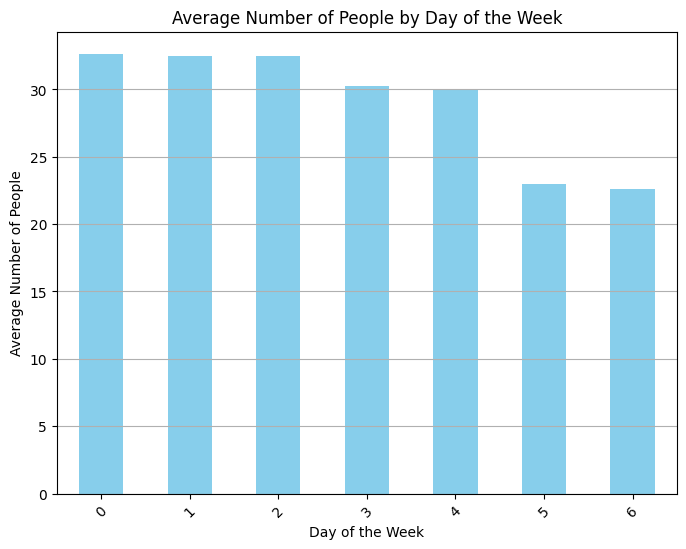

In [ ]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'day_of_week' and calculate the mean number of people for each day
avg_number_of_people = gym_df.groupby('day_of_week')['number_people'].mean()

# Create a bar graph
plt.figure(figsize=(8, 6))
avg_number_of_people.plot(kind='bar', color='skyblue')
plt.title('Average Number of People by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of People')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines only on the y-axis
plt.show()

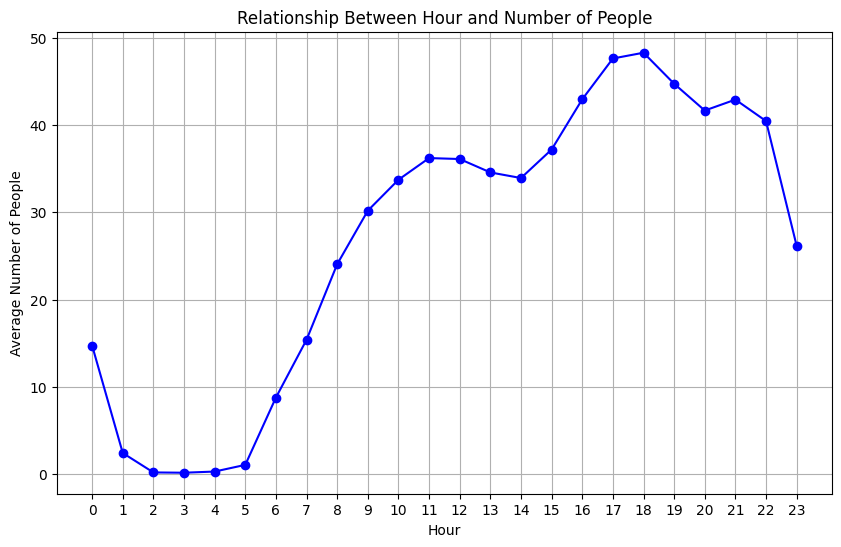

In [ ]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'hour' and calculate the mean number of people for each hour
avg_number_of_people = gym_df.groupby('hour')['number_people'].mean()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(avg_number_of_people.index, avg_number_of_people.values, marker='o', color='blue', linestyle='-')
plt.title('Relationship Between Hour and Number of People')
plt.xlabel('Hour')
plt.ylabel('Average Number of People')
plt.grid(True)
plt.xticks(range(24))  # Set x-axis ticks to show all hours of the day
plt.show()

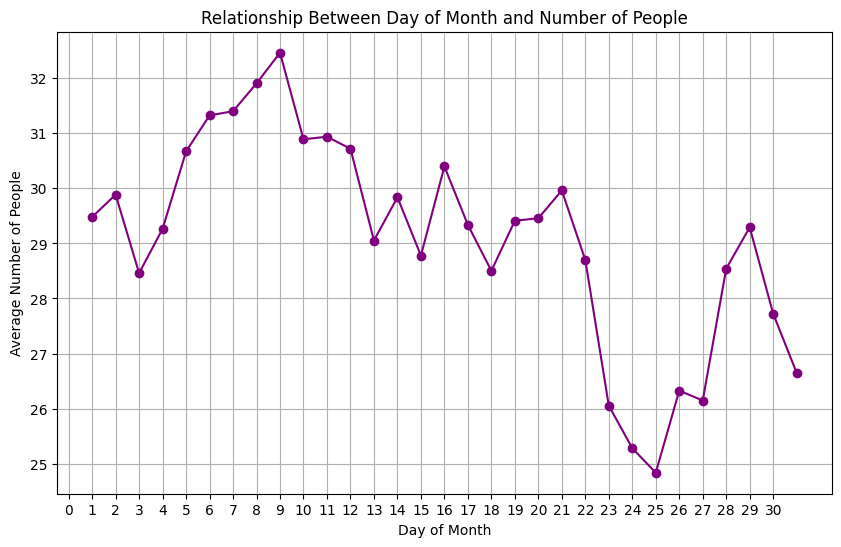

In [ ]:
# Group the DataFrame by 'day_of_month' and calculate the mean number of people for each day
avg_ppl = gym_df.groupby('day_of_month')['number_people'].mean()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(avg_ppl.index, avg_ppl.values, marker='o', color='purple', linestyle='-')
plt.title('Relationship Between Day of Month and Number of People')
plt.xlabel('Day of Month')
plt.ylabel('Average Number of People')
plt.grid(True)
plt.xticks(range(31))  # Set x-axis ticks to show all hours of the day
plt.show()

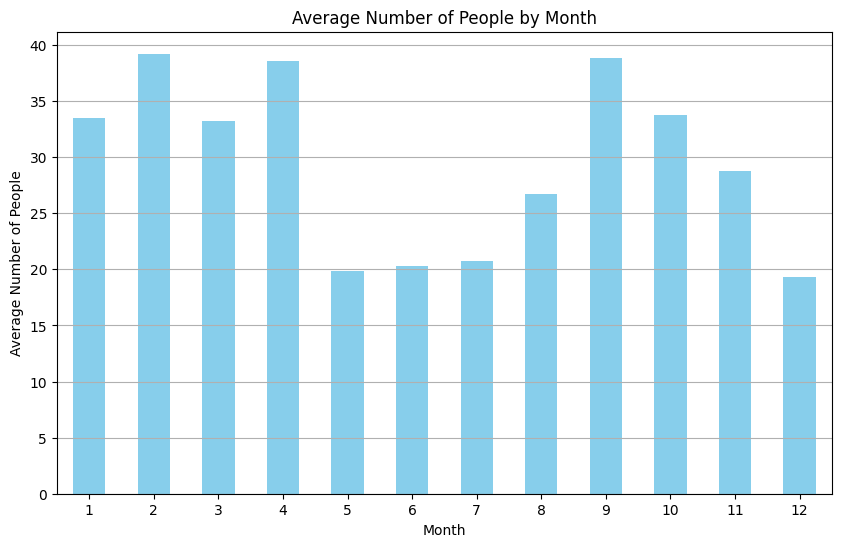

In [ ]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'month' and calculate the mean number of people for each month
avg_number_of_people = gym_df.groupby('month')['number_people'].mean()

# Create a bar graph
plt.figure(figsize=(10, 6))
avg_number_of_people.plot(kind='bar', color='skyblue')
plt.title('Average Number of People by Month')
plt.xlabel('Month')
plt.ylabel('Average Number of People')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines only on the y-axis
plt.show()

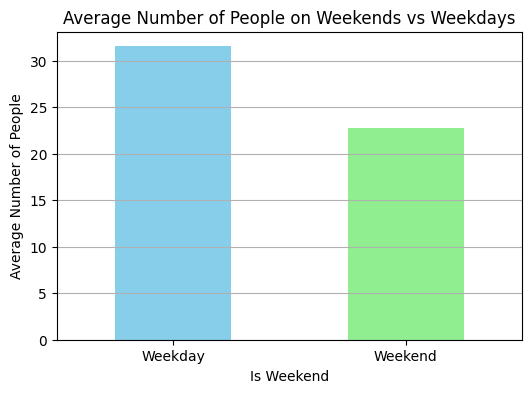

In [ ]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'is_weekend' and calculate the mean number of people for each category
avg_number_of_people = gym_df.groupby('is_weekend')['number_people'].mean()

# Create a bar graph
plt.figure(figsize=(6, 4))
avg_number_of_people.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Average Number of People on Weekends vs Weekdays')
plt.xlabel('Is Weekend')
plt.ylabel('Average Number of People')
plt.xticks(ticks=[0, 1], labels=['Weekday', 'Weekend'], rotation=0)
plt.grid(axis='y')  # Add gridlines only on the y-axis
plt.show()

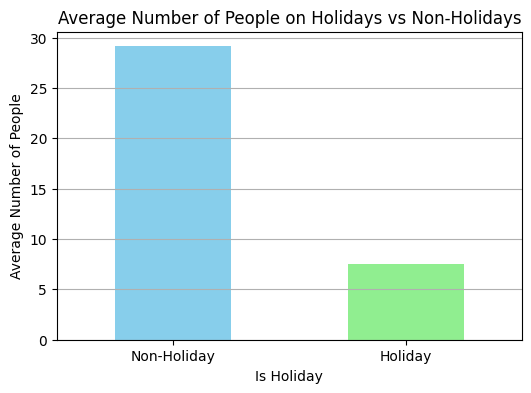

In [ ]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'is_holiday' and calculate the mean number of people for each category
avg_number_of_people = gym_df.groupby('is_holiday')['number_people'].mean()

# Create a bar graph
plt.figure(figsize=(6, 4))
avg_number_of_people.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Average Number of People on Holidays vs Non-Holidays')
plt.xlabel('Is Holiday')
plt.ylabel('Average Number of People')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'], rotation=0)
plt.grid(axis='y')  # Add gridlines only on the y-axis
plt.show()

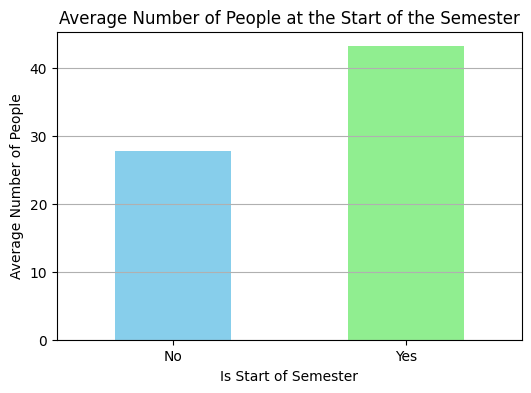

In [ ]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'is_start_of_semester' and calculate the mean number of people for each category
avg_number_of_people = gym_df.groupby('is_start_of_semester')['number_people'].mean()

# Create a bar graph
plt.figure(figsize=(6, 4))
avg_number_of_people.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Average Number of People at the Start of the Semester')
plt.xlabel('Is Start of Semester')
plt.ylabel('Average Number of People')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.grid(axis='y')  # Add gridlines only on the y-axis
plt.show()

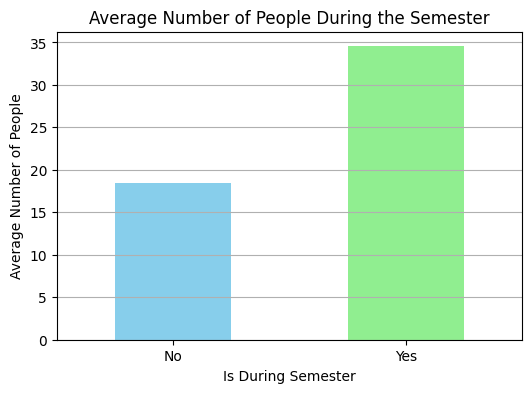

In [ ]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'is_during_semester' and calculate the mean number of people for each category
avg_number_of_people =gym_df.groupby('is_during_semester')['number_people'].mean()

# Create a bar graph
plt.figure(figsize=(6, 4))
avg_number_of_people.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Average Number of People During the Semester')
plt.xlabel('Is During Semester')
plt.ylabel('Average Number of People')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.grid(axis='y')  # Add gridlines only on the y-axis
plt.show()

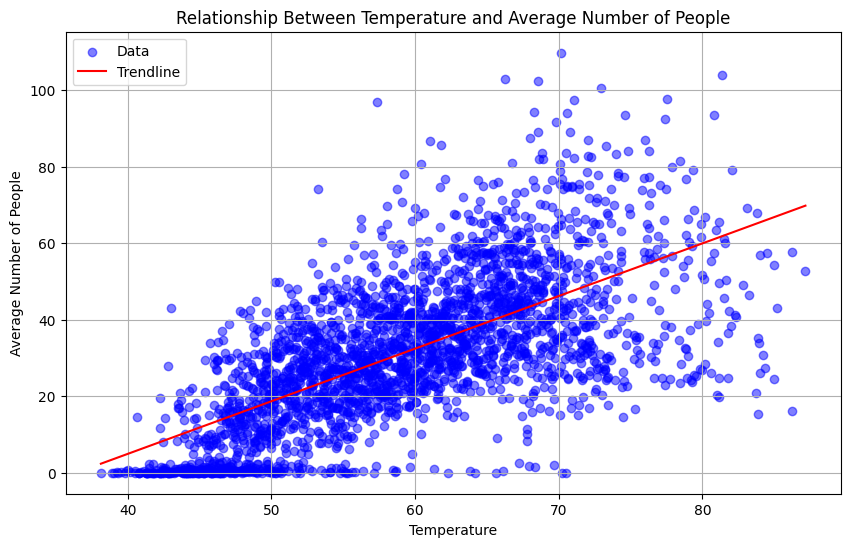

In [ ]:
import numpy as np
from scipy.stats import linregress

# Group the DataFrame by 'temperature' and calculate the mean number of people for each temperature
avg_number_of_people = gym_df.groupby('temperature')['number_people'].mean()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(avg_number_of_people.index, avg_number_of_people.values, color='blue', alpha=0.5, label='Data')

# Fit a linear regression line to the data points
slope, intercept, r_value, p_value, std_err = linregress(avg_number_of_people.index, avg_number_of_people.values)
line = slope * avg_number_of_people.index + intercept

# Plot the linear regression line
plt.plot(avg_number_of_people.index, line, color='red', label='Trendline')

plt.title('Relationship Between Temperature and Average Number of People')
plt.xlabel('Temperature')
plt.ylabel('Average Number of People')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Calculate the correlation between temperature and the average number of people
correlation = gym_df['temperature'].corr(gym_df['number_people'])

print(f"Correlation between temperature and average number of people: {correlation:.2f}")


Correlation between temperature and average number of people: 0.37


### Encoding

In [ ]:
import numpy as np

# Cosine and sine transformation for the hour variable
hourly_df['hour_sin'] = np.sin(2 * np.pi * hourly_df['hour'] / 24)
hourly_df['hour_cos'] = np.cos(2 * np.pi * hourly_df['hour'] / 24)

# Cosine and sine transformation for the day_of_week variable
hourly_df['day_of_week_sin'] = np.sin(2 * np.pi * hourly_df['day_of_week'] / 7)
hourly_df['day_of_week_cos'] = np.cos(2 * np.pi * hourly_df['day_of_week'] / 7)

# Function to get the number of days in a month
def days_in_month(month):
    return 31 if month in [1, 3, 5, 7, 8, 10, 12] else (30 if month in [4, 6, 9, 11] else 28)

# Apply the function to create a new column for the number of days in the month
hourly_df['num_days_monthly'] = hourly_df['month'].apply(days_in_month)

# Cosine and sine transformation for the day variable, normalized by the actual number of days in the month
hourly_df['day_sin'] = np.sin(2 * np.pi * hourly_df['day_of_month'] / hourly_df['num_days_monthly'])
hourly_df['day_cos'] = np.cos(2 * np.pi * hourly_df['day_of_month'] / hourly_df['num_days_monthly'])

# Cosine and sine transformation for the month variable
hourly_df['month_sin'] = np.sin(2 * np.pi * hourly_df['month'] / 12)
hourly_df['month_cos'] = np.cos(2 * np.pi * hourly_df['month'] / 12)

# Display the first few rows to check the new columns
hourly_df.head(12)

# import numpy as np

# gym_df['hour_sin'] = np.sin(2 * np.pi * gym_df['hour'] / 24)
# gym_df['hour_cos'] = np.cos(2 * np.pi * gym_df['hour'] / 24)

# # Cosine and sine transformation for the day_of_week variable
# gym_df['day_of_week_sin'] = np.sin(2 * np.pi * gym_df['day_of_week'] / 7)
# gym_df['day_of_week_cos'] = np.cos(2 * np.pi * gym_df['day_of_week'] / 7)

# # Function to get the number of days in a month
# def days_in_month(month):
#     return 31 if month in [1, 3, 5, 7, 8, 10, 12] else (30 if month in [4, 6, 9, 11] else 28)

# # Apply the function to create a new column for the number of days in the month
# gym_df['num_days_monthly'] = gym_df['month'].apply(days_in_month)

# # Cosine and sine transformation for the day variable, normalized by the actual number of days in the month
# gym_df['day_sin'] = np.sin(2 * np.pi * gym_df['day_of_month'] / gym_df['num_days_monthly'])
# gym_df['day_cos'] = np.cos(2 * np.pi * gym_df['day_of_month'] / gym_df['num_days_monthly'])

# # Cosine and sine transformation for the month variable
# gym_df['month_sin'] = np.sin(2 * np.pi * gym_df['month'] / 12)
# gym_df['month_cos'] = np.cos(2 * np.pi * gym_df['month'] / 12)

# gym_df['avg_num_ppl'] = gym_df['number_people']
# # Display the first few rows to check the new columns
# gym_df.head(12)

,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,day_of_month,...,avg_num_ppl_lag_3,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,num_days_monthly,day_sin,day_cos,month_sin,month_cos
3,72017,4,0,0,68.80,0,0,8,20,14,...,42.2,-0.866025,5.000000e-01,-0.433884,-0.900969,31,0.299363,-0.954139,-0.866025,-0.5
4,75678,4,0,0,68.04,0,0,8,21,14,...,47.8,-0.707107,7.071068e-01,-0.433884,-0.900969,31,0.299363,-0.954139,-0.866025,-0.5
5,79210,4,0,0,67.55,0,0,8,22,14,...,39.8,-0.500000,8.660254e-01,-0.433884,-0.900969,31,0.299363,-0.954139,-0.866025,-0.5
6,82811,4,0,0,67.00,0,0,8,23,14,...,40.2,-0.258819,9.659258e-01,-0.433884,-0.900969,31,0.299363,-0.954139,-0.866025,-0.5
7,10,5,1,0,66.76,0,0,8,0,15,...,44.8,0.000000,1.000000e+00,-0.974928,-0.222521,31,0.101168,-0.994869,-0.866025,-0.5
8,3616,5,1,0,66.32,0,0,8,1,15,...,38.0,0.258819,9.659258e-01,-0.974928,-0.222521,31,0.101168,-0.994869,-0.866025,-0.5
9,19211,5,1,0,65.07,0,0,8,5,15,...,5.0,0.965926,2.588190e-01,-0.974928,-0.222521,31,0.101168,-0.994869,-0.866025,-0.5
10,21617,5,1,0,65.32,0,0,8,6,15,...,0.2,1.000000,6.123234e-17,-0.974928,-0.222521,31,0.101168,-0.994869,-0.866025,-0.5
11,25222,5,1,0,66.80,0,0,8,7,15,...,0.0,0.965926,-2.588190e-01,-0.974928,-0.222521,31,0.101168,-0.994869,-0.866025,-0.5
12,28816,5,1,0,67.80,0,0,8,8,15,...,0.5,0.866025,-5.000000e-01,-0.974928,-0.222521,31,0.101168,-0.994869,-0.866025,-0.5


### Final df for models (model_df)
**Drop columns not applicable to model**

For the model, there will be 11,637 observation/rows and 14 columns.

'avg_num_ppl' is the dependent variable. It represents the average number of people at the gym every hour.

In [ ]:
subset_columns = [
    'avg_num_ppl','is_holiday', 'temperature', # 'is_weekend',
    'is_start_of_semester', 'is_during_semester', 'hour_sin', 'hour_cos',
    'day_of_week_sin', 'day_of_week_cos', 'day_sin', 'day_cos', 'month_sin', 'month_cos', # day_sin  & day_cos is day of month (not number of days in month)
    'avg_num_ppl_lag_1', 'avg_num_ppl_lag_2', 'avg_num_ppl_lag_3'
    ]

# Create a new DataFrame with the selected columns
model_df = hourly_df[subset_columns]

# Display the first few rows of the new DataFrame to check
model_df.head(12)

,avg_num_ppl,is_holiday,temperature,is_start_of_semester,is_during_semester,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,day_sin,day_cos,month_sin,month_cos,avg_num_ppl_lag_1,avg_num_ppl_lag_2,avg_num_ppl_lag_3
3,40.2,0,68.80,0,0,-0.866025,5.000000e-01,-0.433884,-0.900969,0.299363,-0.954139,-0.866025,-0.5,39.8,47.8,42.2
4,44.8,0,68.04,0,0,-0.707107,7.071068e-01,-0.433884,-0.900969,0.299363,-0.954139,-0.866025,-0.5,40.2,39.8,47.8
5,38.0,0,67.55,0,0,-0.500000,8.660254e-01,-0.433884,-0.900969,0.299363,-0.954139,-0.866025,-0.5,44.8,40.2,39.8
6,5.0,0,67.00,0,0,-0.258819,9.659258e-01,-0.433884,-0.900969,0.299363,-0.954139,-0.866025,-0.5,38.0,44.8,40.2
7,0.2,0,66.76,0,0,0.000000,1.000000e+00,-0.974928,-0.222521,0.101168,-0.994869,-0.866025,-0.5,5.0,38.0,44.8
8,0.0,0,66.32,0,0,0.258819,9.659258e-01,-0.974928,-0.222521,0.101168,-0.994869,-0.866025,-0.5,0.2,5.0,38.0
9,0.5,0,65.07,0,0,0.965926,2.588190e-01,-0.974928,-0.222521,0.101168,-0.994869,-0.866025,-0.5,0.0,0.2,5.0
10,0.2,0,65.32,0,0,1.000000,6.123234e-17,-0.974928,-0.222521,0.101168,-0.994869,-0.866025,-0.5,0.5,0.0,0.2
11,1.0,0,66.80,0,0,0.965926,-2.588190e-01,-0.974928,-0.222521,0.101168,-0.994869,-0.866025,-0.5,0.2,0.5,0.0
12,16.4,0,67.80,0,0,0.866025,-5.000000e-01,-0.974928,-0.222521,0.101168,-0.994869,-0.866025,-0.5,1.0,0.2,0.5


### Split into test & training
For CART Tree & Random Forest & XGBoost

In [ ]:
from sklearn.model_selection import train_test_split

# Create feature and target DataFrames
X = model_df.drop(columns="avg_num_ppl")
y = model_df['avg_num_ppl']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False) # By setting shuffle=False, the data is separated into sequential training and testing sets

# Print the sizes of the training and testing sets
print("Training Size = %d" % X_train.shape[0])  # Print the number of samples in the training set
print("Testing Size = %d" % X_test.shape[0])    # Print the number of samples in the testing set

Training Size = 9307
Testing Size = 2327


### Standardize Data

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize and fit the scaler on the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Transform the training and testing data
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)


## Background Functions

### Model Evaluation Function

In [ ]:
from sklearn import metrics

def eval_model(model, X_train, y_train, X_test, y_test):
   y_train_pred = model.predict(X_train)  # Predict on the training set
   y_test_pred = model.predict(X_test)    # Predict on the testing set

   y_train_mean = y_train.mean()  # Calculate the mean of the training target values

   sst_test = np.sum((y_test - y_train_mean) ** 2)  # Calculate the total sum of squares (SST) for the testing set
   ssr_test = np.sum((np.array(y_test).reshape(-1) - y_test_pred) ** 2)  # Calculate the sum of squared residuals (SSR) for the testing set

   r2_train = metrics.r2_score(y_train, y_train_pred)  # Calculate the R-squared score for the training set using sklearn's r2_score function
   r2_test = 1 - (ssr_test / sst_test)  # Calculate the R-squared score for the testing set manually using the SSR and SST

   print("Train R-squared = %.2f" % r2_train)  # Print the R-squared score for the training set
   print("Test R-squared = %.2f" % r2_test)    # Print the R-squared score for the testing set

   r2_test_sklearn = metrics.r2_score(y_test, y_test_pred)
   print("Test R-squared (sklearn) = %.2f" % r2_test_sklearn)


   mse = mean_squared_error(y_test, y_test_pred)
   print(f"Mean Squared Error: {mse}")

# from sklearn import metrics
# import numpy as np

# def eval_model(model, X_train, y_train, X_test, y_test):
#     y_train_pred = model.predict(X_train)  # Predict on the training set
#     y_test_pred = model.predict(X_test)    # Predict on the testing set

#     y_test_mean = y_test.mean()  # Calculate the mean of the testing target values

#     sst_test = np.sum((y_test - y_test_mean) ** 2)  # Calculate the total sum of squares (SST) for the testing set
#     ssr_test = np.sum((np.array(y_test).reshape(-1) - y_test_pred) ** 2)  # Calculate the sum of squared residuals (SSR) for the testing set

#     r2_train = metrics.r2_score(y_train, y_train_pred)  # Calculate the R-squared score for the training set using sklearn's r2_score function
#     r2_test = 1 - (ssr_test / sst_test)  # Calculate the R-squared score for the testing set manually using the SSR and SST

#     print("Train R-squared = %.2f" % r2_train)  # Print the R-squared score for the training set
#     print("Test R-squared = %.2f" % r2_test)    # Print the R-squared score for the testing set

    # Optionally, also print the R-squared score using sklearn's function for comparison



### Feature Importance

#### model for pre-encoding feature importance

In [ ]:
from sklearn.model_selection import train_test_split

subset_columns2 = [
    'avg_num_ppl', 'is_weekend', 'is_holiday', 'temperature',
    'is_start_of_semester', 'is_during_semester', 'hour',
    'day_of_week', 'day_of_month', 'month' # day_sin  & day_cos is day of month (not number of days in month)
]

# Create a new DataFrame with the selected columns
model_df2 = hourly_df[subset_columns2]

# Create feature and target DataFrames
X2 = model_df2.drop(columns="avg_num_ppl")
y2 = model_df2['avg_num_ppl']

# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42, shuffle=False) # By setting shuffle=False, the data is separated into sequential training and testing sets

# Print the sizes of the training and testing sets
print("Training Size = %d" % X_train.shape[0])  # Print the number of samples in the training set
print("Testing Size = %d" % X_test.shape[0])    # Print the number of samples in the testing set

Training Size = 9307
Testing Size = 2327


#### results

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Train the model
dtr2 = DecisionTreeRegressor(random_state=42)
dtr2.fit(X_train2, y_train2)

# Get feature importance
feature_importances2 = pd.DataFrame(dtr2.feature_importances_, index=X2.columns, columns=['importance'])
feature_importances2.sort_values(by='importance', ascending=False, inplace=True)
print(feature_importances2)

                      importance
hour                    0.551455
is_during_semester      0.138928
temperature             0.083429
day_of_week             0.068391
day_of_month            0.066064
month                   0.065499
is_weekend              0.017417
is_start_of_semester    0.008816
is_holiday              0.000000


                      importance
avg_num_ppl_lag_1       0.827933
hour_cos                0.074981
hour_sin                0.026667
avg_num_ppl_lag_2       0.012225
temperature             0.010991
avg_num_ppl_lag_3       0.010502
day_of_week_sin         0.009389
day_sin                 0.005858
day_cos                 0.005054
day_of_week_cos         0.004325
is_during_semester      0.004311
month_cos               0.003548
month_sin               0.003192
is_start_of_semester    0.001024
is_holiday              0.000000


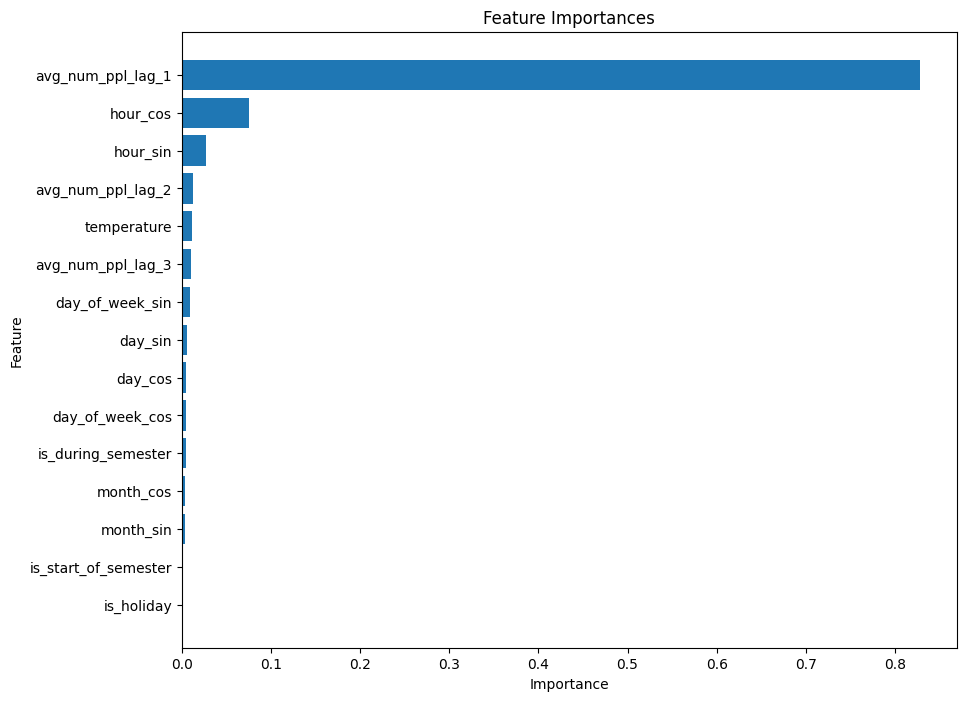

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Train the model
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)

# Get feature importance
feature_importances = pd.DataFrame(dtr.feature_importances_, index=X.columns, columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
print(feature_importances)

plt.figure(figsize=(10, 8))
plt.barh(feature_importances.index, feature_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 150, 200],
    'reg_lambda': [1, 10, 50],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3]
}

# Create a GridSearchCV object
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Evaluate the model
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Calculate metrics
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f"Train R-squared = {train_r2:.2f}")
print(f"Test R-squared = {test_r2:.2f}")
print(f"Mean Squared Error: {test_mse:.2f}")


KeyboardInterrupt: 

# Models

## **Linear Regression**

### Linear Regression Specific Data Split

In [ ]:
#Split the data into 80% in train and 20% in test using the random seed 42.
from sklearn.model_selection import train_test_split
model_df_train, model_df_test = train_test_split(model_df, test_size=0.2, random_state=42)

###Correlation Analysis

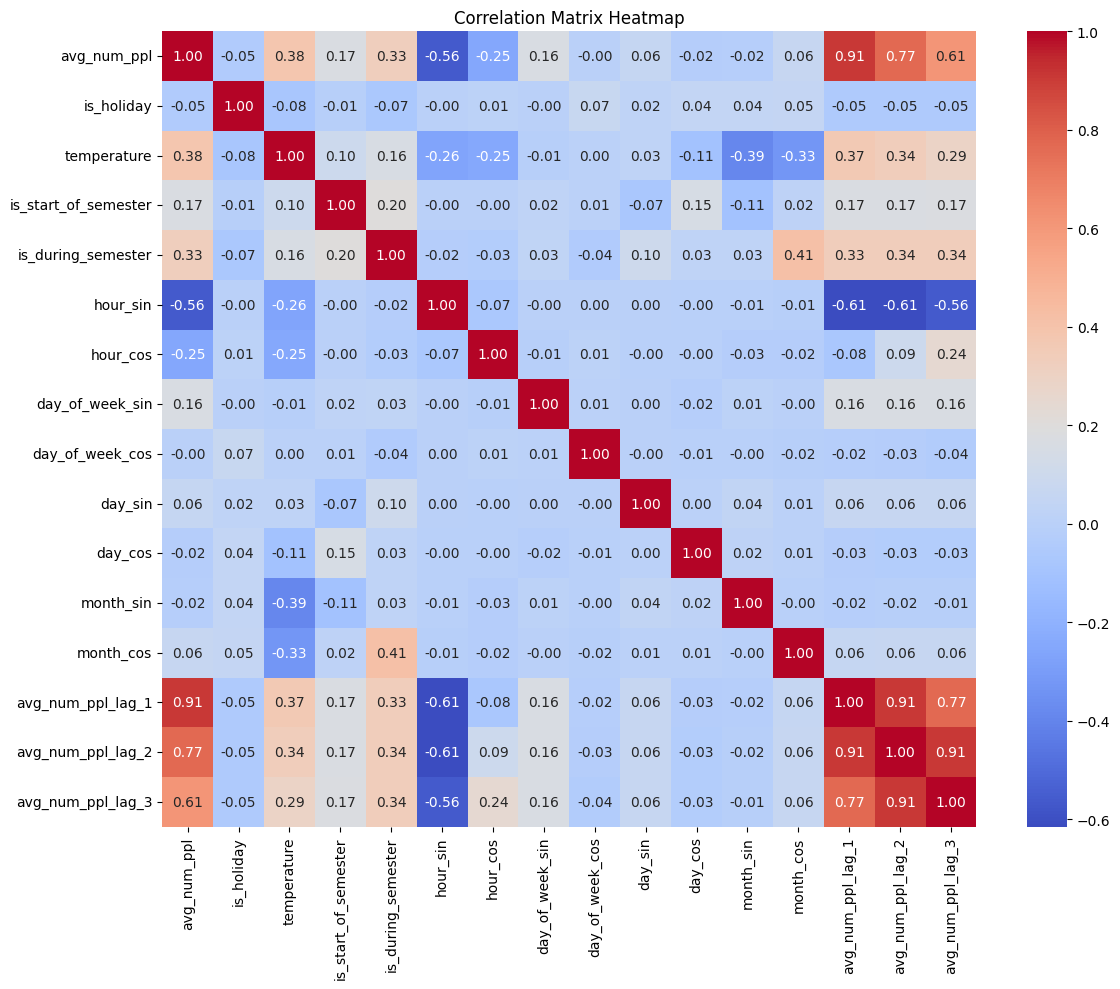

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation calculation
numeric_df_train = model_df_train.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numeric_df_train.corr()

# Set the size of the plot
plt.figure(figsize=(12, 10))

# Visualizing the matrix with heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')

# Adjust the layout to prevent cutoff of labels
plt.tight_layout()

# Show the plot
plt.show()


### Fitting

In [ ]:
## EVERY FEATURE MODEL
import statsmodels.formula.api as smf
#Linear regression model using the training set (Includes all variables)
model_1=smf.ols('avg_num_ppl ~ is_holiday + temperature + is_start_of_semester + '
                'is_during_semester + hour_sin + hour_cos + day_of_week_sin	+'
                'day_of_week_cos	+ day_sin	+ day_cos + month_cos +	month_sin + '
                'avg_num_ppl_lag_1 + avg_num_ppl_lag_2 + avg_num_ppl_lag_3', data=model_df_train)
res_model1= model_1.fit()
print(res_model1.summary())

                            OLS Regression Results                            
Dep. Variable:            avg_num_ppl   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     4268.
Date:                Sun, 02 Jun 2024   Prob (F-statistic):               0.00
Time:                        00:40:12   Log-Likelihood:                -32557.
No. Observations:                9307   AIC:                         6.515e+04
Df Residuals:                    9291   BIC:                         6.526e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1405 

In [ ]:
## IMPORTANT FEATURES ONLY MODEL
# Take out non-statistically significant variables: temperature, is_holiday, avg_num_ppl_lag_3
# Didn't take out any statistically insignificant variables if it was one part of the feature (ie day_sin, day_cos)
model_2=smf.ols('avg_num_ppl ~ is_start_of_semester + '
                'is_during_semester + hour_sin + hour_cos + day_of_week_sin	+'
                'day_of_week_cos	+ day_sin	+ day_cos + month_cos +	month_sin + '
                'avg_num_ppl_lag_1 + avg_num_ppl_lag_2', data=model_df_train)
res_model2= model_2.fit()
print(res_model2.summary())

                            OLS Regression Results                            
Dep. Variable:            avg_num_ppl   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     5330.
Date:                Sun, 02 Jun 2024   Prob (F-statistic):               0.00
Time:                        00:40:16   Log-Likelihood:                -32562.
No. Observations:                9307   AIC:                         6.515e+04
Df Residuals:                    9294   BIC:                         6.524e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.4906 

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize lists to store evaluation metrics
linear_train_num = []
linear_test_num = []

# Make predictions
y_pred_train = res_model2.predict(model_df_train.drop(columns=['avg_num_ppl']))  # assuming 'num_avg_ppl' is the target variable
y_pred_test = res_model2.predict(model_df_test.drop(columns=['avg_num_ppl']))

# Calculate metrics for training set
print("Training Metrics")
mae_train = mean_absolute_error(model_df_train['avg_num_ppl'], y_pred_train)
print("Mean Absolute Error (MAE) on Training Set:", mae_train)
linear_train_num.append(mae_train)

mse_train = mean_squared_error(model_df_train['avg_num_ppl'], y_pred_train)
print("Mean Squared Error (MSE) on Training Set:", mse_train)
linear_train_num.append(mse_train)

rmse_train = mean_squared_error(model_df_train['avg_num_ppl'], y_pred_train, squared=False)
print("Root Mean Squared Error (RMSE) on Training Set:", rmse_train)
linear_train_num.append(rmse_train)

r2_train = r2_score(model_df_train['avg_num_ppl'], y_pred_train)
print("R-squared (R2) on Training Set:", r2_train)
linear_train_num.append(r2_train)

print("\n")

# Calculate metrics for testing set
print("Testing Metrics")
mae_test = mean_absolute_error(model_df_test['avg_num_ppl'], y_pred_test)
print("Mean Absolute Error (MAE) on Testing Set:", mae_test)
linear_test_num.append(mae_test)
mse_test = mean_squared_error(model_df_test['avg_num_ppl'], y_pred_test)
print("Mean Squared Error (MSE) on Testing Set:", mse_test)
linear_test_num.append(mse_test)
rmse_test = mean_squared_error(model_df_test['avg_num_ppl'], y_pred_test, squared=False)
print("Root Mean Squared Error (RMSE) on Testing Set:", rmse_test)
linear_test_num.append(rmse_test)
r2_test = r2_score(model_df_test['avg_num_ppl'], y_pred_test)
print("R-squared (R2) on Testing Set:", r2_test)
linear_test_num.append(r2_test)


Training Metrics
Mean Absolute Error (MAE) on Training Set: 5.657694613755945
Mean Squared Error (MSE) on Training Set: 64.0358982268327
Root Mean Squared Error (RMSE) on Training Set: 8.002243324645452
R-squared (R2) on Training Set: 0.8731231221342547


Testing Metrics
Mean Absolute Error (MAE) on Testing Set: 5.683741968876417
Mean Squared Error (MSE) on Testing Set: 64.33272500476457
Root Mean Squared Error (RMSE) on Testing Set: 8.020768355012166
R-squared (R2) on Testing Set: 0.8789691131162921


## **CART Tree**

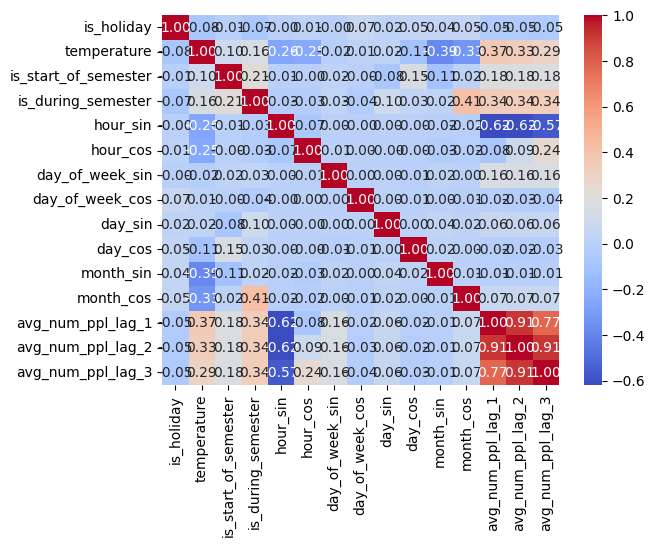

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix to check for multicollinearity
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define the parameter grid for grid search
param_grid = {
    "max_depth": [1, 3, 5, 7],
    # "min_samples_leaf": [1, 2, 3, 4],
    "min_samples_split": [2, 5, 10, 15, 20],
}

# Create a GridSearchCV object
gs_tree = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    return_train_score=True,
    param_grid=param_grid,
    scoring='r2',
    cv=5 # Change scoring metric to one suitable for regression
)

# Fit the model to the data
gs_tree.fit(X_train_s, y_train)

# Get the best parameters
print("Best parameters: ", gs_tree.best_params_)
# Let's evaluate the model performance
print("CART Tree")
eval_model(gs_tree, X_train_s, y_train, X_test_s, y_test)

Best parameters:  {'max_depth': 7, 'min_samples_split': 20}
CART Tree
Train R-squared = 0.93
Test R-squared = 0.90
Test R-squared (sklearn) = 0.79
Mean Squared Error: 44.335181592304444


In [ ]:
param_grid = {
    "max_depth": [3, 5, 7, 10],
    "min_samples_leaf": [1, 2, 4, 6, 8],
    "min_samples_split": [2, 5, 10, 15, 20],
    "max_features": [None, 'sqrt', 'log2']
}

gs_tree = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    return_train_score=True
)

gs_tree.fit(X_train, y_train)
print("Best parameters: ", gs_tree.best_params_)
# Let's evaluate the model performance
print("CART Tree")
eval_model(gs_tree, X_train, y_train, X_test, y_test)

Best parameters:  {'max_depth': 7, 'max_features': None, 'min_samples_leaf': 6, 'min_samples_split': 20}
CART Tree
Train R-squared = 0.93
Test R-squared = 0.91
Test R-squared (sklearn) = 0.82
Mean Squared Error: 38.98426693917613


                 feature  importance
12     avg_num_ppl_lag_1    0.883875
5               hour_cos    0.075016
4               hour_sin    0.023841
6        day_of_week_sin    0.006652
1            temperature    0.002775
3     is_during_semester    0.002703
13     avg_num_ppl_lag_2    0.002082
14     avg_num_ppl_lag_3    0.001694
11             month_cos    0.000864
7        day_of_week_cos    0.000230
10             month_sin    0.000207
8                day_sin    0.000062
2   is_start_of_semester    0.000000
0             is_holiday    0.000000
9                day_cos    0.000000


<BarContainer object of 13 artists>

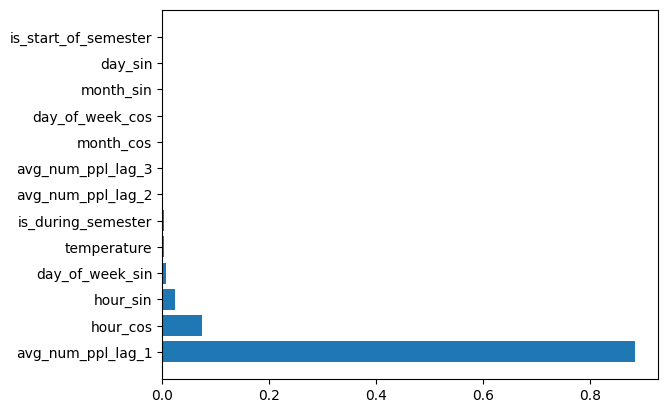

In [ ]:
m_tr = gs_tree.best_estimator_

#Random Forest
importance_output = pd.DataFrame({'feature':X_train.columns,
                                 'importance':m_tr.feature_importances_}).sort_values('importance', ascending = False)

print(importance_output)
plt.barh(importance_output['feature'][0:13], importance_output['importance'][0:13])

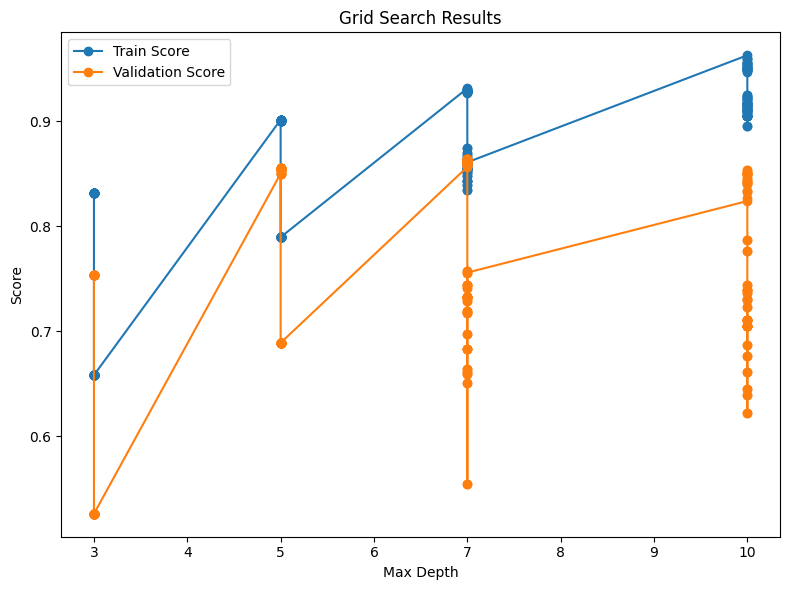

In [ ]:
# Get the mean train and test scores for each parameter combination
mean_train_scores = gs_tree.cv_results_['mean_train_score']
# Retrieve the mean training scores for each parameter combination
# These scores represent the average performance on the training set across the cross-validation folds

mean_validation_scores = gs_tree.cv_results_['mean_test_score']
# Retrieve the mean validation scores for each parameter combination
# These scores represent the average performance on the validation set across the cross-validation folds

# Get the parameter values used in the grid search
param_values = gs_tree.cv_results_['param_max_depth'].data
# Retrieve the values of the 'max_depth' parameter used in the grid search
# These are the different values of 'max_depth' that were evaluated during the grid search

# Plot the results
plt.figure(figsize=(8, 6))
# Create a new figure with a size of 8 inches by 6 inches

plt.plot(param_values, mean_train_scores, marker='o', label='Train Score')
# Plot the mean training scores against the parameter values
# Use circular markers ('o') for the data points
# Label the plotted line as 'Train Score'

plt.plot(param_values, mean_validation_scores, marker='o', label='Validation Score')
# Plot the mean validation scores against the parameter values
# Use circular markers ('o') for the data points
# Label the plotted line as 'Validation Score'

plt.xlabel('Max Depth')
# Set the label for the x-axis to 'Max Depth'
# This indicates that the x-axis represents the different values of the 'max_depth' parameter

plt.ylabel('Score')
# Set the label for the y-axis to 'Score'
# This indicates that the y-axis represents the performance scores (train and validation scores)

plt.title('Grid Search Results')
# Set the title of the plot to 'Grid Search Results'
# This provides a descriptive title for the plot

plt.legend()
# Add a legend to the plot
# The legend will show the labels for each plotted line ('Train Score' and 'Validation Score')

plt.tight_layout()
# Adjust the spacing between the plot elements to minimize empty space
# This ensures that the plot is properly sized and elements do not overlap

plt.show()
# Display the plot

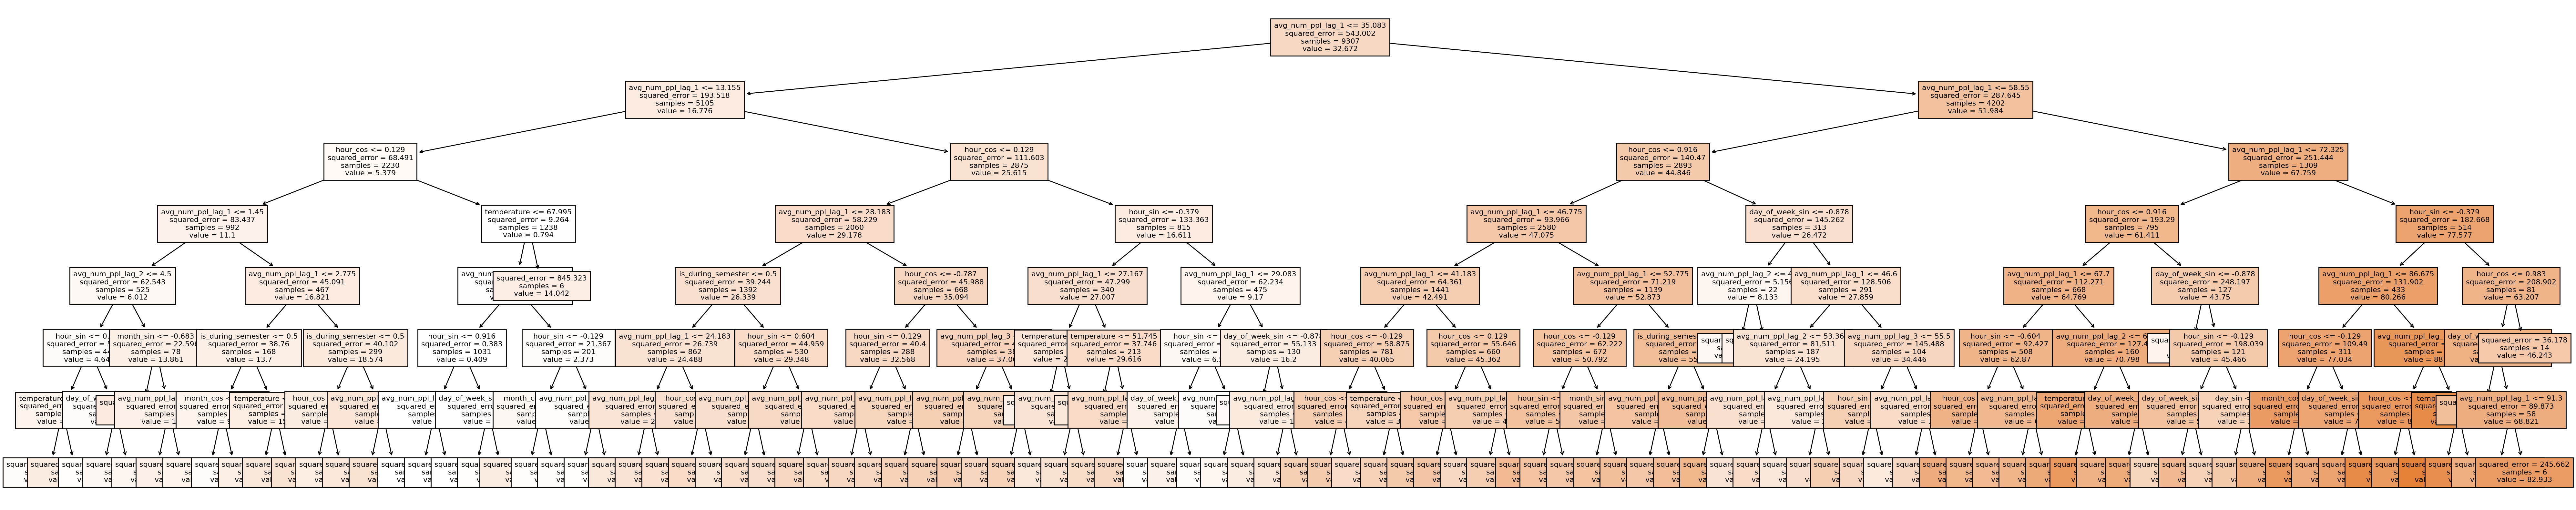

In [ ]:
from sklearn.tree import plot_tree

m_cart = gs_tree.best_estimator_

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (50,10), dpi=200)
plot_tree(m_cart, feature_names = X_train.columns, filled = True, fontsize = 8);

In [ ]:
## !!!!!!! No need to retrain because the GridSearchCV automatically does the retraining after finding the optimal parameter

from sklearn import metrics

def eval_model(model, X_train, y_train, X_test, y_test):
   y_train_pred = model.predict(X_train)  # Predict on the training set
   y_test_pred = model.predict(X_test)    # Predict on the testing set

   y_train_mean = y_train.mean()  # Calculate the mean of the training target values

   sst_test = np.sum((y_test - y_train_mean) ** 2)  # Calculate the total sum of squares (SST) for the testing set
   ssr_test = np.sum((np.array(y_test).reshape(-1) - y_test_pred) ** 2)  # Calculate the sum of squared residuals (SSR) for the testing set

   r2_train = metrics.r2_score(y_train, y_train_pred)  # Calculate the R-squared score for the training set using sklearn's r2_score function
   r2_test = 1 - (ssr_test / sst_test)  # Calculate the R-squared score for the testing set manually using the SSR and SST

   print("Train R-squared = %.2f" % r2_train)  # Print the R-squared score for the training set
   print("Test R-squared = %.2f" % r2_test)    # Print the R-squared score for the testing set

In [ ]:
# Evaluate the best model obtained from grid search
eval_model(gs_tree, X_train, y_train, X_test, y_test)
# gs_tree contains the best model found during the grid search

Train R-squared = 0.93
Test R-squared = 0.91


## **Random Forest**

#### Course Search & Fit

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define a coarse parameter grid
param_grid = {
    'n_estimators': [220],
    'max_depth': [5],
    # 'min_samples_split': [2, 4, 6],
    # 'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with the Random Forest model and the coarse parameter grid
gs_rf = GridSearchCV(RandomForestRegressor(random_state=42),  # Random forest regressor with fixed random state
   return_train_score=True,                 # Return training scores
   param_grid=param_grid,                   # Parameter grid for grid search
   cv=5,                                    # Number of cross-validation folds
   scoring='r2',
)

# Fit the model to the data
gs_rf.fit(X_train, y_train)


# Get the best estimator from grid search
m_rf = gs_rf.best_estimator_

# Get the best parameters
best_params = gs_rf.best_params_
print("Best Hyperparameters from Coarse Search:", best_params)

# Get the best score
best_score = gs_rf.best_score_
print("Best Score from Coarse Search (r2):", best_score)

# Let's evaluate the model performance
print("Random Forest")
eval_model(gs_rf, X_train, y_train, X_test, y_test)

Best Hyperparameters from Coarse Search: {'max_depth': 5, 'n_estimators': 220}
Best Score from Coarse Search (r2): 0.8709269007028781
Random Forest
Train R-squared = 0.91
Test R-squared = 0.91


                 feature  importance
12     avg_num_ppl_lag_1    0.900973
5               hour_cos    0.071218
4               hour_sin    0.016586
6        day_of_week_sin    0.003770
14     avg_num_ppl_lag_3    0.003383
13     avg_num_ppl_lag_2    0.001632
3     is_during_semester    0.001254
1            temperature    0.000664
7        day_of_week_cos    0.000334
11             month_cos    0.000048
8                day_sin    0.000046
2   is_start_of_semester    0.000045
9                day_cos    0.000037
10             month_sin    0.000011
0             is_holiday    0.000000


<BarContainer object of 13 artists>

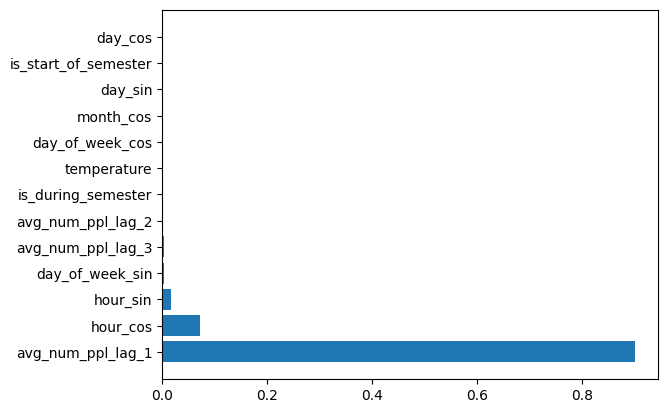

In [ ]:
m_rf = gs_rf.best_estimator_

#Random Forest
importance_output = pd.DataFrame({'feature':X_train.columns,
                                 'importance':m_rf.feature_importances_}).sort_values('importance', ascending = False)

print(importance_output)
plt.barh(importance_output['feature'][0:13], importance_output['importance'][0:13])

#### Fine Search & Fit

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define a finer parameter grid based on the coarse search results
param_grid_fine = {
    'n_estimators': [200, 300],
    'max_depth': [3, 5, 7],
    # 'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with the Random Forest model and the fine parameter grid
gs_rf_fine = GridSearchCV(RandomForestRegressor(random_state=42),  # Random forest regressor with fixed random state
   return_train_score=True,                 # Return training scores
   param_grid=param_grid_fine,              # Parameter grid for grid search
   cv=4,                                    # Number of cross-validation folds
   scoring='r2',)

# Fit the model to the data
gs_rf_fine.fit(X_train, y_train)

# Get the best parameters
best_params_fine = gs_rf_fine.best_params_
print("Best Hyperparameters from Fine Search:", best_params_fine)

# Get the best score
best_score_fine = gs_rf_fine.best_score_
print("Best Score from Fine Search (r2):", best_score_fine)
eval_model(gs_rf_fine, X_train, y_train, X_test, y_test)

Best Hyperparameters from Fine Search: {'max_depth': 7, 'min_samples_leaf': 4, 'n_estimators': 200}
Best Score from Fine Search (r2): 0.8932770617094674
Train R-squared = 0.94
Test R-squared = 0.92


## **XGBoost**


### Coarse Search & Fit

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Coarse
param_grid = {
    'n_estimators': [150, 200, 300],
    'learning_rate': [0.01, 0.02],
    'max_depth': [5, 7, 9],
    # 'min_child_weight': [3, 5, 7],
    # 'colsample_bytree': [0.7, 0.8, 1],
    # 'gamma': [0.1, 0.2, 0.3],
    # 'subsample': [0.7, 0.8, 0.9],
    # 'reg_alpha': [0.1, 1, 10],
    'reg_lambda': [1, 10, 50]
}

# Define the parameters for the model
gs_xgb = GridSearchCV(
   xgb.XGBRegressor(random_state=42),  # XGBoost regressor with fixed random state
   return_train_score=True,            # Return training scores
   param_grid=param_grid,              # Parameter grid for grid search
   cv=3,                               # Number of cross-validation folds
   scoring='r2'                        # Use R^2 as the scoring metric
)

# Fit the model using grid search
gs_xgb.fit(X_train_s, y_train)
# X_train: Training features
# y_train: Training targets

# Get the best estimator from grid search
m_xgb = gs_xgb.best_estimator_

# Print the best parameters found by grid search
print("Best parameters: ", gs_xgb.best_params_)
eval_model(gs_xgb, X_train_s, y_train, X_test_s, y_test)

Best parameters:  {'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 200, 'reg_lambda': 1}
Train R-squared = 0.94
Test R-squared = 0.92


                 feature  importance
12     avg_num_ppl_lag_1    0.764960
5               hour_cos    0.084078
4               hour_sin    0.029175
14     avg_num_ppl_lag_3    0.018321
3     is_during_semester    0.017346
6        day_of_week_sin    0.017077
7        day_of_week_cos    0.015902
13     avg_num_ppl_lag_2    0.011639
11             month_cos    0.010103
2   is_start_of_semester    0.008378
1            temperature    0.008180
10             month_sin    0.007980
8                day_sin    0.003628
9                day_cos    0.003233
0             is_holiday    0.000000


<BarContainer object of 13 artists>

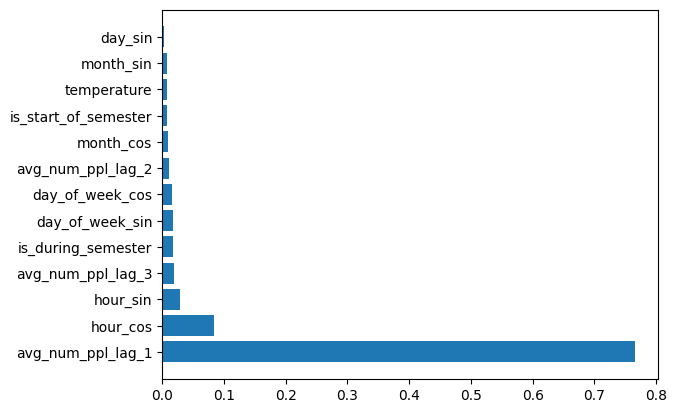

In [ ]:
m_xg = gs_xgb.best_estimator_

#Random Forest
importance_output = pd.DataFrame({'feature':X_train.columns,
                                 'importance':m_xg.feature_importances_}).sort_values('importance', ascending = False)

print(importance_output)
plt.barh(importance_output['feature'][0:13], importance_output['importance'][0:13])

### Fine Search & Fit

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Fine
param_grid_fine = {
    'n_estimators': [200],
    'learning_rate': [0.01],
    'max_depth': [7],
    'min_child_weight': [3, 5, 7],
    'colsample_bytree': [0.7, 0.8, 1],
    'gamma': [0.1, 0.2, 0.3],
    'subsample': [0.7, 0.8, 0.9],
    'reg_alpha': [0.1, 1, 10],
    'reg_lambda': [50]
}

# Define the parameters for the model
gs_xgb_fine = GridSearchCV(
   xgb.XGBRegressor(random_state=42),  # XGBoost regressor with fixed random state
   return_train_score=True,            # Return training scores
   param_grid=param_grid_fine,              # Parameter grid for grid search
   cv=3,                               # Number of cross-validation folds
   scoring='r2'                        # Use R^2 as the scoring metric
)

# Fit the model using grid search
gs_xgb_fine.fit(X_train, y_train)
# X_train: Training features
# y_train: Training targets

# Get the best estimator from grid search
m_xgb_fine = gs_xgb_fine.best_estimator_

# Print the best parameters found by grid search
print("Best parameters: ", gs_xgb_fine.best_params_)
eval_model(gs_xgb_fine, X_train, y_train, X_test, y_test)

Best parameters:  {'colsample_bytree': 1, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 7, 'n_estimators': 200, 'reg_alpha': 10, 'reg_lambda': 50, 'subsample': 0.9}
Train R-squared = 0.90
Test R-squared = 0.89


## DEMO


In [ ]:
# Install Gradio
!pip install gradio

import gradio as gr
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Assuming you have a trained model; otherwise, train/load your model here
# For demonstration, let's create a dummy model
# Note: Replace this with your actual model training or loading code
model = gs_xgb
# Example dummy data (replace with your actual training data)
X_dummy = pd.DataFrame({
    'is_weekend': np.random.randint(0, 2, 100),
    'is_holiday': np.random.randint(0, 2, 100),
    'temperature': np.random.uniform(60, 90, 100),
    'is_start_of_semester': np.random.randint(0, 2, 100),
    'is_during_semester': np.random.randint(0, 2, 100),
    'hour_sin': np.sin(2 * np.pi * np.random.randint(0, 24, 100) / 24),
    'hour_cos': np.cos(2 * np.pi * np.random.randint(0, 24, 100) / 24),
    'day_of_week_sin': np.sin(2 * np.pi * np.random.randint(0, 7, 100) / 7),
    'day_of_week_cos': np.cos(2 * np.pi * np.random.randint(0, 7, 100) / 7),
    'day_sin': np.sin(2 * np.pi * np.random.randint(1, 31, 100) / 30),
    'day_cos': np.cos(2 * np.pi * np.random.randint(1, 31, 100) / 30),
    'month_sin': np.sin(2 * np.pi * np.random.randint(1, 12, 100) / 12),
    'month_cos': np.cos(2 * np.pi * np.random.randint(1, 12, 100) / 12)
})
y_dummy = np.random.randint(10, 100, 100)
model.fit(X_dummy, y_dummy)

# Define the prediction function
def predict_gym_attendance(is_weekend, is_holiday, temperature, is_start_of_semester,
                           is_during_semester, hour, day_of_week, day, month):
    # Create a DataFrame from the input parameters
    input_data = pd.DataFrame({
        'is_weekend': [is_weekend],
        'is_holiday': [is_holiday],
        'temperature': [temperature],
        'is_start_of_semester': [is_start_of_semester],
        'is_during_semester': [is_during_semester],
        'hour_sin': [np.sin(2 * np.pi * hour / 24)],
        'hour_cos': [np.cos(2 * np.pi * hour / 24)],
        'day_of_week_sin': [np.sin(2 * np.pi * day_of_week / 7)],
        'day_of_week_cos': [np.cos(2 * np.pi * day_of_week / 7)],
        'day_sin': [np.sin(2 * np.pi * day / 30)],
        'day_cos': [np.cos(2 * np.pi * day / 30)],
        'month_sin': [np.sin(2 * np.pi * month / 12)],
        'month_cos': [np.cos(2 * np.pi * month / 12)]
    })

    # Make predictions
    prediction = model.predict(input_data)
    return int(prediction[0])

# Define the Gradio interface
interface = gr.Interface(
    fn=predict_gym_attendance,
    inputs=[
        gr.Checkbox(label="Is Weekend"),
        gr.Checkbox(label="Is Holiday"),
        gr.Slider(0, 100, step=0.1, label="Temperature"),
        gr.Checkbox(label="Is Start of Semester"),
        gr.Checkbox(label="Is During Semester"),
        gr.Slider(0, 23, step=1, label="Hour"),
        gr.Slider(0, 6, step=1, label="Day of Week"),
        gr.Slider(1, 31, step=1, label="Day"),
        gr.Slider(1, 12, step=1, label="Month")
    ],
    outputs="number",
    title="Gym Attendance Predictor",
    description="Predict the number of people at the gym based on various factors."
)

# Launch the interface
interface.launch()
